<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/SegmentData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment

In [ ]:
!pip install -U seglearn

     |████████████████████████████████| 11.3MB 6.7MB/s 


In [ ]:
from numpy import array
from numpy.random import rand

# multivariate time series data
X = [rand(100,5), rand(200,5),rand(50,5)]

X = array([rand(100,5), rand(200,5), rand(50,5)])

In [ ]:
y = [2,1,3]
# or
y = array([2,1,3])


array([2, 1, 3])

In [ ]:
y = [rand(100), rand(200), rand(50)]


In [ ]:
from seglearn.base import TS_Data
Xt = array([rand(100,5), rand(200,5), rand(50,5)])
Xc = rand(3,2)
X = TS_Data(Xt, Xc)
X

NameError: ignored

In [ ]:
import pandas as pd
df = pd.DataFrame(Xc)
df['ts_data'] = Xt
X = TS_Data.from_df(df)

In [ ]:
X = [rand(1000,10)]
y = [rand(1000)]

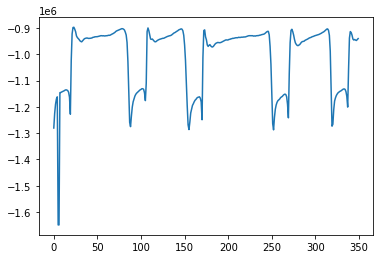

In [ ]:
from seglearn.transform import Segment, FeatureRep, FeatureRepMix
from seglearn.feature_functions import minimum, maximum
from seglearn.base import TS_Data

import numpy as np
import pandas as pd
from matplotlib import pyplot
dataset = pd.read_csv('fits.csv', header=0) # header = 0 means first row is header

data = dataset.values.astype(float)

size = data.shape[0];
X = data[1:size,1];
n = range(100,1000)
#pyplot.plot(n,X[n])
pyplot.plot(X[500:850])
pyplot.show()

In [ ]:
X1 = X[1000:2000];
X2 = X[2000:3000];
X3 = X[3000:4000];
X.shape

(8433,)

In [ ]:
Xa= np.array([X1, X2,X3])
print(Xa.shape)

np.savetxt('fitseg.txt',Xa)

(3, 1000)


In [ ]:
Xr = np.loadtxt('fitseg.txt')
Xr.shape

(3, 1000)

In [ ]:
# display header of dataset
dataset.head()

,850nm,640nm,940nm,580nm,Channel 5,Channel 6,Channel 7,Channel 8
0,0.0,-1115420.0,962200.0,-1250630.0,0,0,0,0
1,342173.0,-1115330.0,962714.0,-1251730.0,0,0,0,0
2,342042.0,-1114790.0,962405.0,-1250810.0,0,0,0,0
3,341707.0,-1115100.0,962623.0,-1251190.0,0,0,0,0
4,341200.0,-1114490.0,961944.0,-1251580.0,0,0,0,0


In [ ]:
data_mean = np.mean(X)
data_std = np.std(X)
cut_off = data_std*3
lower, upper = data_mean - cut_off, data_mean + cut_off;
# identify outliers
outliers = [x for x in X if x <lower or x > upper]
loc = [i for i in range(len(X)) if X[i] <lower or X[i] > upper]
print('Identify outliers: %d' %len(outliers))
print('Outliers location: %d' %len(loc))
loc

Identify outliers: 4
Outliers location: 4


[505, 506, 1736, 7870]